In [1]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.normal import Normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torchvision.models as models
sns.set()

seed = 1

np.random.seed(seed)
torch.manual_seed(seed)

Assume we are doing classification with a model parameterised by $\theta$, whose inputs $I$ produce outputs $z$. 

In machine learning, we are trying to minimise a cross-entropy loss: $
\mathcal{L}(\theta) = \mathbb{E}_P [-\log Q_{\theta} (z | I)],$


We can rewrite this with respect to each class as: 
$ \mathcal{L}(\theta) = -\log (\frac{e^{t|c}}{\sum_{j} e^{t|j}}) $


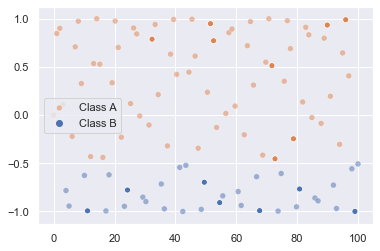

In [2]:
x1 = torch.linspace(0,100)
x2 = torch.sin(x1) 

y = torch.sign(x2 + .5).to(torch.long)

## convert into fun tensors 
x = torch.stack([x1,x2]).T
y[y==-1] = 0

## split into training and test
test_indices  = [11,24,32,49,51,52,54,67,71,72,78,80,89,95,98]
train_indices = [i for i in np.linspace(0,99,100) if i not in test_indices ]

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test   = x[test_indices], y[test_indices]


fig, ax = plt.subplots()

pal = sns.color_palette("coolwarm", 4)

sns.scatterplot(x_train[:,0], x_train[:,1],hue=y_train,alpha=0.5,ax=ax, cmap=pal)
sns.scatterplot(x_test[:,0], x_test[:,1], hue=y_test, ax=ax, cmap=pal)

ax.legend(['Class A','Class B'])
plt.show()

We'll start by creating our dataset from the above points. 

We want a set of points $(x1,x2)$ that has an associated class label $y$. We'll one-hot code the labels for ease.

Iter 10/100 - Loss: 5.999
Iter 20/100 - Loss: 1.185
Iter 30/100 - Loss: 0.639
Iter 40/100 - Loss: 0.154
Iter 50/100 - Loss: 0.204
Iter 60/100 - Loss: 0.160
Iter 70/100 - Loss: 0.125
Iter 80/100 - Loss: 0.114
Iter 90/100 - Loss: 0.108
Iter 100/100 - Loss: 0.103


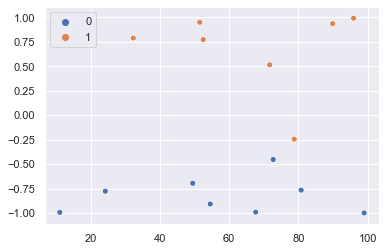

In [16]:
inputs, labels = x_train, y_train

net = nn.Linear(2,2)

criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(net.parameters(), lr=0.1)

training_iterations = 100

for i in range(training_iterations):
    optimiser.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    
    loss.backward()
    optimiser.step()

    if (i+1) % 10 == 0:
        print('Iter %d/%d - Loss: %.3f' % (i + 1, training_iterations, loss.item()))
    
    
## test on some new examples 
fig, ax = plt.subplots()


outputs = net(x_test)
outputs_ = [1 if o[0]<o[1] else 0 for o in outputs]

sns.scatterplot(x_test[:,0], x_test[:,1],hue=outputs_)

PyTorch gives us easy access to the Jacobian:

In [29]:
net.weight.grad

tensor([[ 0.2623,  0.0036],
        [-0.2623, -0.0036]])

# Bishop Treatment

https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/bishop-hessian-nc-92.pdf

I'm working through this paper. 

## Feed-forward networks 

We have a network where activation $z_i$ is non-linear function of the input to the unit:

$$ z_i = f(a_i) $$

the input $a_i$ is given by a weighted linear sum of outputs of other units:

$$ a_i = \sum_{j} w_{ij}z_{j} + \theta_{i} $$

$w$ is a weight, $\theta$ is a bias. 

Given an error function $E$ we want the first and second derivatives, one for each entry in the training set:

$$ E = \sum_p E_p $$

where $p$ is the label. 

We obtain the derviatives of $E$ by summing the derivatives for each entry. 

